In [1]:
pip install numpy pandas statsmodels matplotlib


<ipython-input-2-4bcaafd745dd>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2020-01-01", periods=n, freq="M")


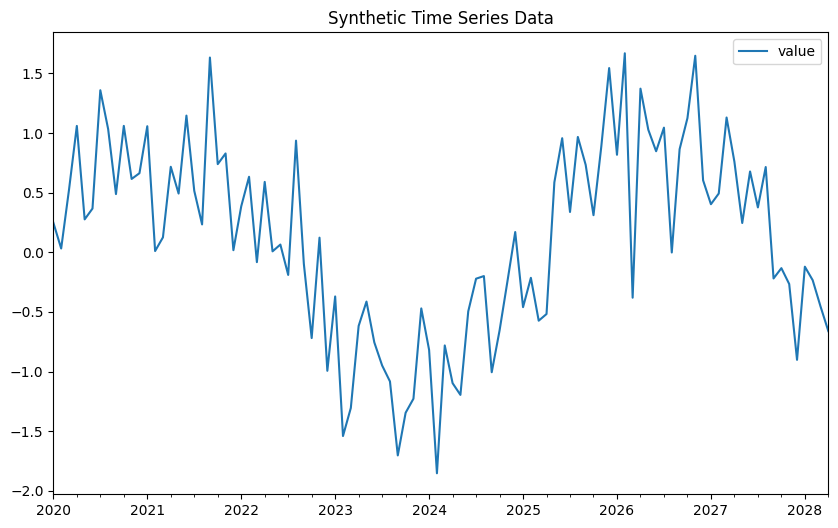

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Create synthetic time series data
np.random.seed(42)

# Generate a simple time series (e.g., monthly data over 100 time points)
n = 100
time_series = np.sin(np.linspace(0, 10, n)) + np.random.normal(0, 0.5, n)

# Convert to pandas DataFrame (to handle time series data more efficiently)
dates = pd.date_range(start="2020-01-01", periods=n, freq="M")
data = pd.DataFrame(time_series, index=dates, columns=["value"])

# Plot the synthetic time series data
data.plot(figsize=(10, 6))
plt.title("Synthetic Time Series Data")
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -78.859
Date:                Tue, 18 Feb 2025   AIC                            163.718
Time:                        06:01:01   BIC                            171.503
Sample:                    01-31-2020   HQIC                           166.868
                         - 04-30-2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0894      0.164     -0.546      0.585      -0.410       0.232
ma.L1         -0.5983      0.131     -4.579      0.000      -0.854      -0.342
sigma2         0.2864      0.043      6.604      0.0

<ipython-input-3-b520e4fe1558>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=11, freq="M")[1:], forecast, label='Forecasted Values', color='red')


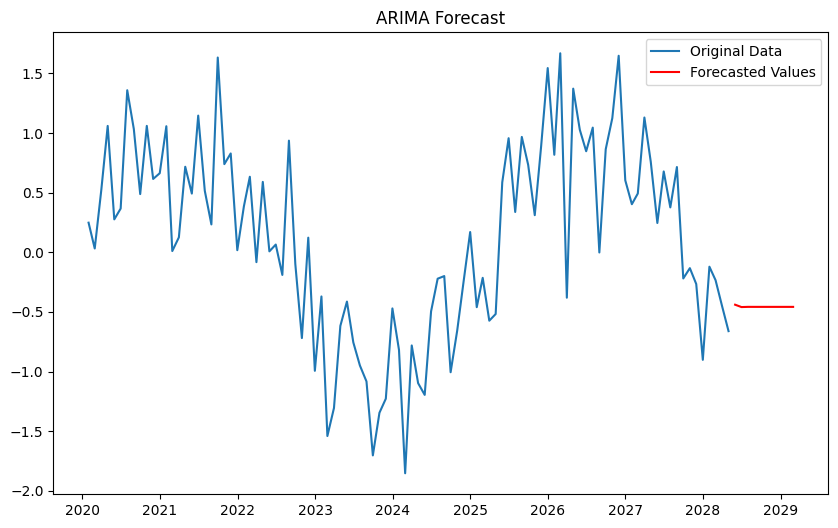

In [3]:
# Step 2: Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(data['value'], order=(1, 1, 1))
model_fit = model.fit()

# Step 3: Print model summary
print(model_fit.summary())

# Step 4: Forecast the next 10 time points
forecast = model_fit.forecast(steps=10)
print("Forecasted Values:", forecast)

# Plot the original data and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Original Data')
plt.plot(pd.date_range(data.index[-1], periods=11, freq="M")[1:], forecast, label='Forecasted Values', color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()
